## EDA ##

Importamos librerias necesarias y cargamos los datos

In [2]:
import pandas as pd
import numpy as np

# Carga el dataset
df = pd.read_parquet("dataset_ok.parquet")

# Visualiza las primeras filas
df.head()


,budget,id,overview,popularity,release_date,revenue,title,vote_average,vote_count,collection_name,genre_names,companies_names,countries_names,spoken_language_names,release_year,return,actor_names,director_names,features,vote_average_scaled
0,0,253292,"a comedic, brutally honest documentary followi...",2.811629,2014-03-08,0.0,harmontown,6.9,37.0,sin colección,['documentary'],[],[],['english'],2014.0,0.000000,"['Dan Harmon', 'Erin McGathy', 'Spencer Critte...",['Neil Berkeley'],['documentary'] ['Neil Berkeley'] [],0.69
1,0,156268,a no-nonsense cop has a flair for fashion and ...,3.097025,2013-03-22,228.0,inappropriate comedy,3.6,31.0,sin colección,['comedy'],[],[],"['english', 'deutsch']",2013.0,0.000000,"['Rob Schneider', 'Michelle Rodriguez', 'Adrie...",['Vince Offer'],['comedy'] ['Vince Offer'] [],0.36
2,0,68297,the documentary recounts the world's first nuc...,1.127808,2005-08-05,0.0,hiroshima,6.2,13.0,sin colección,"['documentary', 'drama']",['british broadcasting corporation (bbc)'],['united kingdom'],"['english', '日本語']",2005.0,0.000000,"['John Hurt', 'Shuntaro Hida', 'Robert Austin'...",['Paul Wilmshurst'],"['documentary', 'drama'] ['Paul Wilmshurst'] [...",0.62
3,150000000,809,"shrek, fiona and donkey set off to far, far aw...",16.229860,2004-05-19,919838758.0,shrek 2,6.7,3082.0,shrek collection,"['adventure', 'animation', 'comedy', 'family',...","['dreamworks skg', 'pacific data images (pdi)'...",['united states of america'],['english'],2004.0,6.132258,"['Mike Myers', 'Eddie Murphy', 'Cameron Diaz',...","['Andrew Adamson', 'Kelly Asbury', 'Conrad Ver...","['adventure', 'animation', 'comedy', 'family',...",0.67
4,0,171795,a behind the scenes look into george romero's ...,1.452115,2013-10-18,0.0,birth of the living dead,6.6,22.0,sin colección,['documentary'],"['glass eye pix', 'predestinate productions']",['united states of america'],['english'],2013.0,0.000000,['George A. Romero'],['Rob Kuhns'],['documentary'] ['Rob Kuhns'] ['united states ...,0.66


Revisamos columnas disponibles para nuestro análisis

In [3]:
# Listamos todas las columnas disponibles en el dataset para conocer las variables con las que trabajaremos.
df.columns


Index(['budget', 'id', 'overview', 'popularity', 'release_date', 'revenue',
       'title', 'vote_average', 'vote_count', 'collection_name', 'genre_names',
       'companies_names', 'countries_names', 'spoken_language_names',
       'release_year', 'return', 'actor_names', 'director_names', 'features',
       'vote_average_scaled'],
      dtype='object')

Verificación de valores nulos en el dataset


In [4]:
# Chequeo de valores nulos en todo el DataFrame
nulos = df.isnull().sum()

# Muestra las columnas que contienen valores nulos
nulos = nulos[nulos > 0]
print(nulos)


# Calcular porcentaje de valores nulos
nulos_porcentaje = (nulos / len(df)) * 100

# Mostrar porcentaje con 2 decimales
nulos_porcentaje = nulos_porcentaje.round(2)

# Mostrar porcentaje con 2 decimales y símbolo de porcentaje
nulos_porcentaje_formateado = nulos_porcentaje.astype(str) + '%'
print("Porcentaje de nulos por columna:\n", nulos_porcentaje_formateado)





overview            9
actor_names       102
director_names    102
dtype: int64
Porcentaje de nulos por columna:
 overview          0.39%
actor_names       4.43%
director_names    4.43%
dtype: object


Verificamos valores duplicados

In [5]:
# Chequeo de valores duplicados
duplicados = df.duplicated().sum()

# Imprimir si hay duplicados y eliminar si es necesario
if duplicados > 0:
    print(f"Hay {duplicados} registros duplicados.")
    df = df.drop_duplicates()
else:
    print("No hay registros duplicados.")


No hay registros duplicados.


Chequeamos tipos de datos

In [6]:
# Verifica los tipos de datos de cada columna
print(df.dtypes)

# Si alguna columna tiene un tipo de dato incorrecto, puedes convertirlo
# Por ejemplo, si la columna 'release_date' no es tipo datetime:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Verifica los cambios
print(df.dtypes)


budget                     int64
id                         int64
overview                  object
popularity               float64
release_date              object
revenue                  float64
title                     object
vote_average             float64
vote_count               float64
collection_name           object
genre_names               object
companies_names           object
countries_names           object
spoken_language_names     object
release_year             float64
return                   float64
actor_names               object
director_names            object
features                  object
vote_average_scaled      float64
dtype: object
budget                            int64
id                                int64
overview                         object
popularity                      float64
release_date             datetime64[ns]
revenue                         float64
title                            object
vote_average                    float64
vote_c

Analisis estadisticos de datos

In [7]:
# Calculamos estadísticas descriptivas para las columnas numéricas, como media, mediana, mínimo, máximo y percentiles.
# Estas estadísticas nos dan una idea del rango y distribución de las variables numéricas.
df.describe()

,budget,id,popularity,release_date,revenue,vote_average,vote_count,release_year,return,vote_average_scaled
count,2.300000e+03,2300.000000,2300.000000,2300,2.300000e+03,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,8.529841e+06,148039.079130,4.721526,2011-05-18 16:41:06.782608640,2.501782e+07,5.708565,230.734348,2010.885217,12.726355,0.570857
min,0.000000e+00,35.000000,0.002353,2004-01-01 00:00:00,0.000000e+00,0.000000,0.000000,2004.000000,0.000000,0.000000
25%,0.000000e+00,28162.750000,0.855575,2008-03-30 18:00:00,0.000000e+00,5.100000,7.000000,2008.000000,0.000000,0.510000
50%,0.000000e+00,90346.500000,2.448735,2011-09-19 12:00:00,0.000000e+00,5.900000,21.500000,2011.000000,0.000000,0.590000
75%,1.000000e+06,264073.750000,6.794364,2014-08-07 06:00:00,2.568250e+03,6.700000,94.000000,2014.000000,0.000000,0.670000
max,2.500000e+08,463800.000000,213.849907,2017-10-20 00:00:00,2.787965e+09,10.000000,12114.000000,2017.000000,26881.720430,1.000000
std,2.629380e+07,133944.050555,8.842463,NaN,1.163287e+08,1.566938,767.790146,3.717498,560.651706,0.156694


#### Análisis de Correlaciones Bivariadas ####

Gráfico de barras con la distribución de películas por género

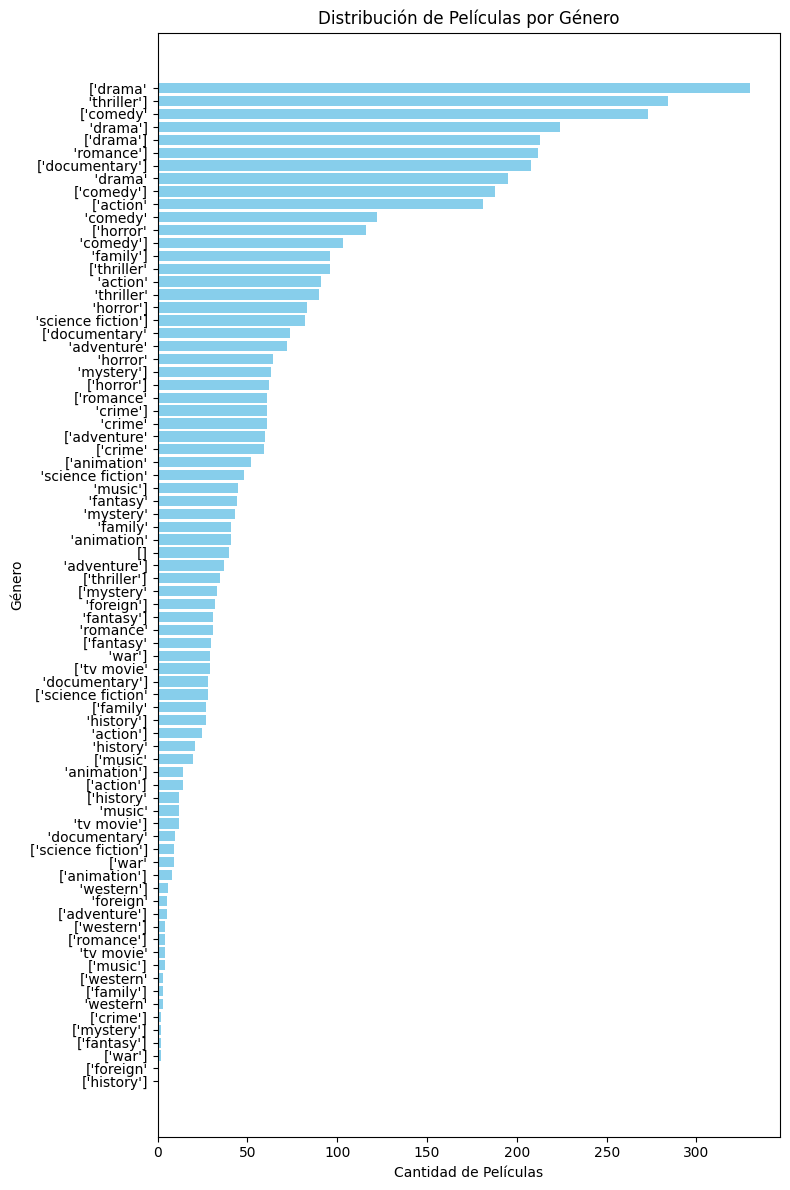

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# Separar los géneros en listas individuales y contar la frecuencia de cada uno
generos = df['genre_names'].str.split(',').sum()
conteo_generos = Counter(generos)

# Convertir a DataFrame y ordenar por frecuencia
df_generos = pd.DataFrame(conteo_generos.items(), columns=['Genero', 'Frecuencia']).sort_values(by='Frecuencia')

# Graficar en barras horizontales
plt.figure(figsize=(8, 12))
plt.barh(df_generos['Genero'], df_generos['Frecuencia'], color='skyblue')
plt.title("Distribución de Películas por Género")
plt.xlabel("Cantidad de Películas")
plt.ylabel("Género")

# Asegurar que el gráfico no tenga etiquetas superpuestas
plt.tight_layout()
plt.show()


Gráfico de dispersión entre vote_average y revenue

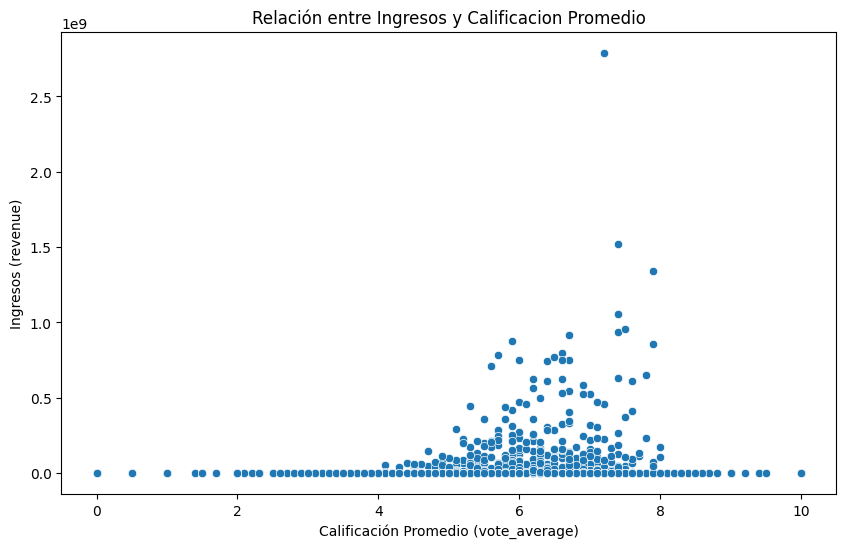

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión entre 'vote_average' y 'revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='revenue', data=df)
plt.title('Relación entre Ingresos y Calificacion Promedio')
plt.xlabel('Calificación Promedio (vote_average)')
plt.ylabel('Ingresos (revenue)')
plt.show()


#### Análisis de correlaciones multivariado ####

Evolución de las calificaciones y popularidad de películas a lo largo del tiempo

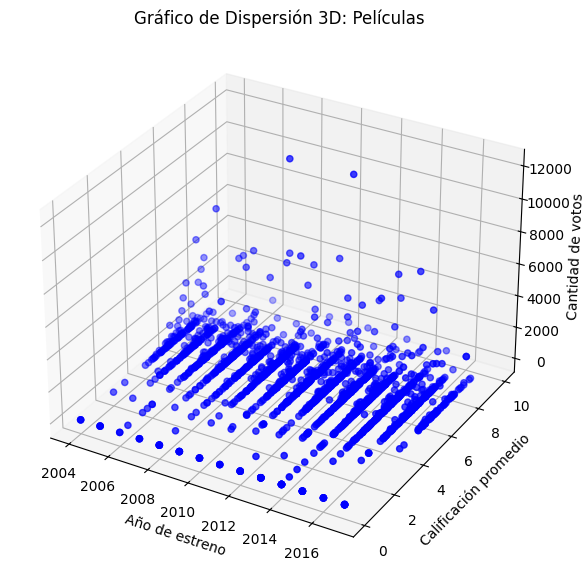

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargamos el dataset
df = pd.read_parquet('dataset_ok.parquet')


# Creamos la figura y los ejes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Creamos el gráfico de dispersión
ax.scatter(df['release_year'], df['vote_average'], df['vote_count'], c='b', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Año de estreno')
ax.set_ylabel('Calificación promedio')
ax.set_zlabel('Cantidad de votos')

# Título del gráfico
ax.set_title('Gráfico de Dispersión 3D: Películas')

# Mostrar el gráfico
plt.show()


      budget      id                                           overview  \
0          0  253292  a comedic, brutally honest documentary followi...   
1          0  156268  a no-nonsense cop has a flair for fashion and ...   
2          0   68297  the documentary recounts the world's first nuc...   
3  150000000     809  shrek, fiona and donkey set off to far, far aw...   
4          0  171795  a behind the scenes look into george romero's ...   

   popularity release_date      revenue                     title  \
0    2.811629   2014-03-08          0.0                harmontown   
1    3.097025   2013-03-22        228.0      inappropriate comedy   
2    1.127808   2005-08-05          0.0                 hiroshima   
3   16.229860   2004-05-19  919838758.0                   shrek 2   
4    1.452115   2013-10-18          0.0  birth of the living dead   

   vote_average  vote_count   collection_name  \
0           6.9        37.0     sin colección   
1           3.6        31.0     sin 

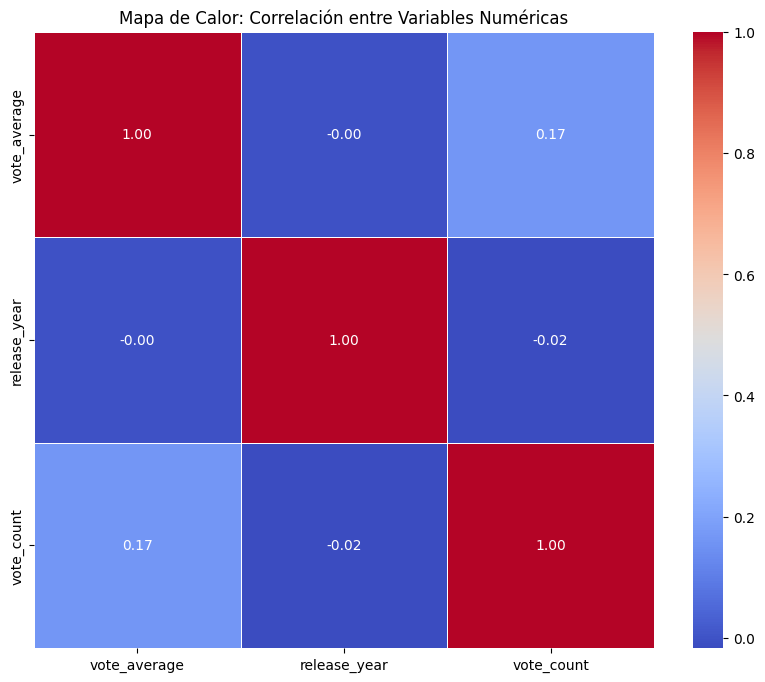

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tu dataset
df = pd.read_parquet('dataset_ok.parquet')

# Ver las primeras filas de tu dataset para conocer las columnas disponibles
print(df.head())

# Seleccionar solo las columnas numéricas para el análisis de correlación
# Esto puede incluir 'vote_average', 'release_year', 'vote_count', y otras si las tienes
numerical_columns = df[['vote_average', 'release_year', 'vote_count']]

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título
plt.title('Mapa de Calor: Correlación entre Variables Numéricas')

# Mostrar el gráfico
plt.show()
